In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import networkx as nx
import random

In [2]:
G = nx.DiGraph()
#例としてノード数52,エッジ数2704のネットワークを生成する
#ノードリスト
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
#エッジリスト
edge = []
for i in range(len(nodes)):
    for j in range(len(nodes)):
        edge.append((nodes[i],nodes[j])) #全てのノードから全てのノードへエッジが張られている完全グラフを想定している
#エッジの重みは-10~10の間でランダムに付与する
weight = []
for i in range(len(edge)):
        weight.append(random.uniform(-10.0, 10.0))
#重み付きエッジリスト
edges=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
        edges.append((nodes[i],nodes[j],weight[i]))

G.add_nodes_from(nodes) #ネットワークにノードを追加
G.add_weighted_edges_from(edges) #ネットワークにエッジを追加

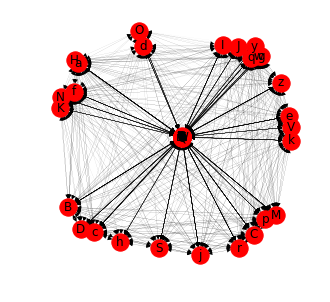

In [7]:
#一度適当に可視化してみる
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
edge_width = [d["weight"] * 0.01 for (u, v, d) in G.edges(data=True)] #重みによってエッジの色を濃くしてみる
nx.draw_networkx(G, pos,with_labels=True,width=edge_width)
plt.axis("off")
plt.show()

In [34]:
#Helmholtz-Hodge分解を実行する下準備
nodeID1 = []
nodeID2 = []
for u in range(len(nodes)):
    for v in range(len(nodes)):
        nodeID1.append(u+1)
        nodeID2.append(v+1)
dict = {'node1':nodeID1,'node2':nodeID2,'weight':weight}
df = pd.DataFrame(dict) 
df.to_csv('フォルダ名/edgelist.csv') #任意のフォルダにcsvを作成
#csvの中身であるnode1,node2,weightをcsvを開いてコピペしてVisual Studio Codeで用意したdatファイルに書き込む(力技)
#indexはコピーせずID:1のノードからID:1のノードへの重みが書き込んである行からコピペする

In [59]:
#Helmholtz-Hodge分解をFALCONで実行した結果のファイルのうち_potential.datファイルを読み込む
f = open("フォルダ名/実行したファイル名_potential.dat")
areas = f.read().split()
potential = areas[1::2] #ホッジポテンシャルのみのリスト作成
f.close()

potential_float = []
for item in potential:
    potential_float.append(float(item)) #文字列から少数に直す
    
hh_dict = {k: v for k, v in zip(nodes,potential_float)} #ノードとポテンシャルの辞書
sort_hh = sorted(hh_dict.items(), key=lambda x:x[1],reverse=True) #ポテンシャル規準に降順ソート

sort_nodes = []
for i in range(len(sort_hh)):
        sort_nodes.append(sort_hh[i][0]) #ソートしたノードだけ抽出
sort_potential = []
for i in range(len(sort_hh)):
        sort_potential.append(sort_hh[i][1]) #ソートしたポテンシャル数値だけ抽出

pos_x = []
pos_y = []
for i in range(len(nodes)):
        pos_x.append(pos[nodes[i]][0])
for i in range(len(nodes)):
        pos_y.append(pos[nodes[i]][1]) #posのxとyをそれぞれのリストへ

pos_potential = []
for i in range(len(potential)):
    pos_potential.append(np.array((pos_x[i],potential_float[i]))) 
pos_hhd = {k: v for k, v in zip(nodes,pos_potential)} #y座標をホッジポテンシャルに置き換えたpos辞書

In [64]:
#x座標を0(原点)にしたい場合
pos0 = ['0']*len(nodes) #0で埋めたリストを用意
hh_ = []
for i in range(len(nodes)):
    hh_.append(float(pos0[i])) #少数の形にする
hh = []
for i in range(len(nodes)):
    hh.append(np.array((hh_[i],potential_float[i]))) 
pos_0 = {k: v for k, v in zip(nodes,hh)} #y座標をポテンシャルに置き換えた + x座標が0のpos辞書

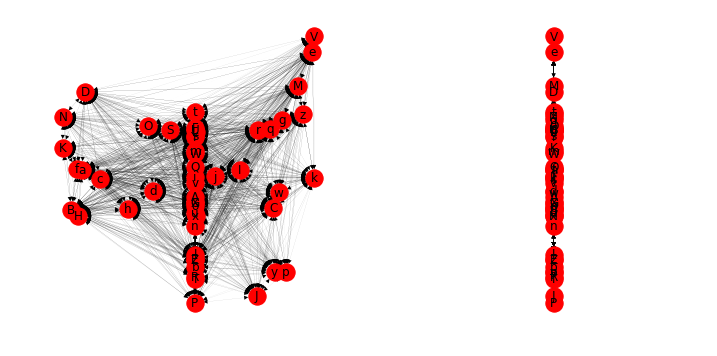

In [65]:
fig=plt.figure(figsize=(12,6))

#x座標をspring_layoutで得た座標のまま、y座標をホッジポテンシャルに置き換えたネットワーク
ax_1=fig.add_subplot(121)
edge_width = [d["weight"] * 0.01 for (u, v, d) in G.edges(data=True)]
nx.draw_networkx(G, pos_hhd, with_labels=True, width=edge_width, ax=ax_1)
plt.axis("off")

#x座標を0、y座標をホッジポテンシャルに置き換えたネットワーク
#ネットワーク内ノードの上流～下流までが分かりやすく可視化できる
ax_2=fig.add_subplot(122)
nx.draw_networkx(G, pos_0, with_labels=True, width=edge_width, ax=ax_2)
plt.axis("off")

plt.show()